# 構造データの多様性を確認

In [1]:
# 距離計算モジュール
import pandas as pd 
import numpy as np 
from scipy.spatial.distance import (pdist, cdist, 
                                    squareform)

from scipy.sparse import csr_matrix

from rdkit import Chem 
import rdkit 
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
print(rdkit.__version__)

RDKit WARNING: [12:35:35] Enabling RDKit 2019.09.3 jupyter extensions


2019.09.3


In [2]:
# 可視化
import matplotlib.pyplot as plt 
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'MS Gothic'
mpl.rcParams['font.size'] = 25.
mpl.rcParams['figure.figsize'] = [10, 10]
from sklearn.manifold import TSNE

In [4]:
df = pd.read_csv('../data/delaney-solubility/delaney-processed.csv')

In [ ]:
df.head(3)

In [5]:
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)

In [6]:
X = np.matrix([GetMorganFingerprintAsBitVect(m, radius=3, nBits=256)
              for m in df['mol']])

In [7]:
X
# pdistあるいはcdistを使うことでサンプル同士の
# 類似度を網羅的に計算

matrix([[1, 1, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1]])

In [8]:
D = squareform(pdist(X, 'jaccard'))

## タニモト係数

('Jaccard係数'とも呼ばれる)

$$
  c_{\rm Tanimoto}(A,B) = \frac{\#\{A \cap B\}}{\#\{A \cup B\}} 
$$

AとBの和集合の要素数を、AとBの積集合の要素数で
割ったものがタニモト係数。

In [9]:
from scipy.spatial import distance 
distance.jaccard([1, 0, 0], [1, 0, 0])# jaccard distanceを用いているので、自分同士の距離は0

0.0

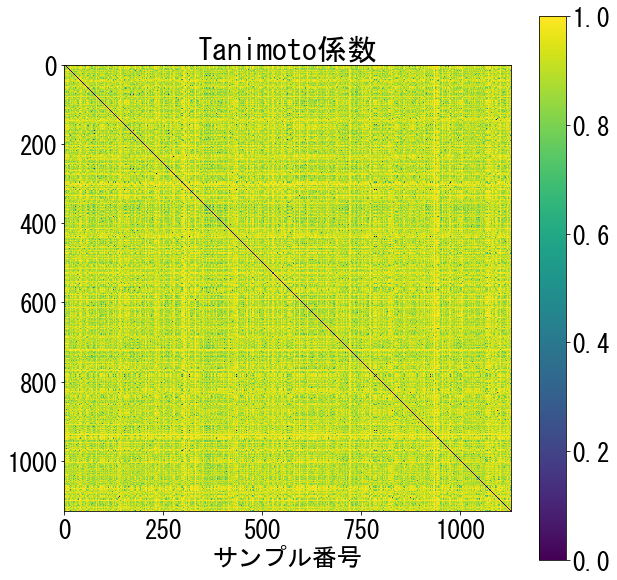

In [10]:
plt.imshow(D)
plt.colorbar()
plt.title('Tanimoto係数')
plt.xlabel('サンプル番号')
plt.savefig('../results/eda/tanimotocoef.png')
plt.show()

In [11]:
tsne = TSNE(n_components=2, random_state=66)
T = tsne.fit_transform(D)

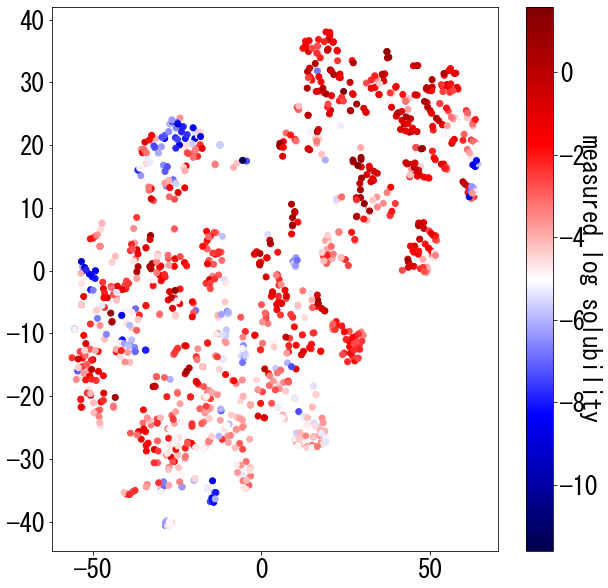

In [12]:
y = df['measured log solubility in mols per litre'].values
plt.scatter(T[:,0],T[:,1], c=y, cmap=plt.cm.seismic)
cbar = plt.colorbar()
cbar.set_label('measured log solubility', rotation = 270)
plt.savefig('../results/eda/tsne_result_logS.png')
plt.show()

## 考察例

1. Tanimoto係数で似ているとされている構造でも、log水溶解度は必ずしも近くならない
1. また、クラスターは特に出来ていないため、データを分ける必要はなさそう